# GC Log Processing
#### Ellis Brown, 2021

### Specify a log file in the cell for "Path" below, then run all cells to run analysis on the gc log processing.

In [8]:
# Create gc log file by running with the following flags:
# ""-Xlog:gc*,gc+phases=debug:file=FILENAME.log"


# Set the path to the file we would like to analyze
pl.setLogPath("datasets/gc.log")

In [9]:
# Overhead : For development only.
%load_ext autoreload
%autoreload 2

### Begin processing log information. Plots data and trends

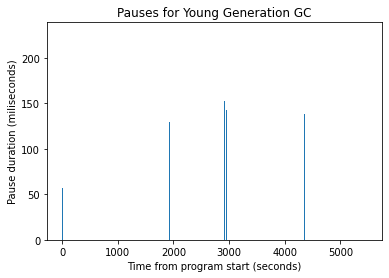

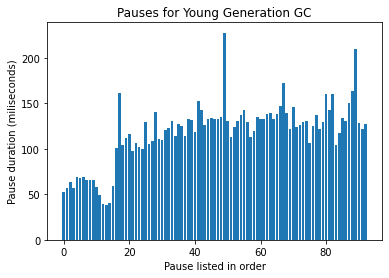

Total pauses: 93
Max wait: 227.891 ms
Total wait: 10983.897 ms
Average wait: 118.1064 ms


In [33]:
''' Begin processing log information into specific variables '''
from scripts import process_log as pl
from scripts import plot_data as dplt

# Get the pauses information from that file.
table_young_pauses = pl.getPauses(create_csv = False)

# plot the data for pauses, printing to output the trends.
dplt.plot_pauses(table_young_pauses)

# To inspect more information about this, access the variable "table_ypauses"
# TODO: Transform second table into line graph

In [ ]:
''' Analyze heap allocation througout the program '''
from scripts import process_log as pl
from scripts import plot_data as dplt

# Get the pauses information from that file.
heap_allocation_sections = pl.getPauses(create_csv = False)

# plot the data for pauses, printing to output the trends.
dplt.plot_heap_allocation_breakdown(heap_allocation_sections)



###Below is just testing. Temporary below.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path='/Users/ellisbrown/Desktop/Project/bucket_parse/ex.csv'


column_titles = ["Time, Memory Changed"]
df = pd.read_csv(path)
    #print(list(df.iloc[:,0]))
    #csv_reader=csv.reader(csv_file, delimiter=",", usecols = column_titles)
x_values = list(df.iloc[:,3])
x = []
for entry in x_values:
    x.append(entry[:-1])
y_values = list(df.iloc[:,0])
## Only plot the first 5, due to label confusion. TODO.
max_items = 10 #len(y_values) for max
plt.bar(x = x[:max_items], height = y_values[:max_items])


plt.ylabel("Miliseconds wait");

## Find interesting trends within the data.
def find_trends(df):
    wait_times = list(df.iloc[:,0])
    max_wait = max(wait_times, key = lambda i : float(i))
    print("Max wait: " + str(max_wait) + " ms")
    
    total_wait   = round(sum(float(i) for i in wait_times), 4)
    average_wait = round(total_wait / len(wait_times), 4)
    print("Total wait: " + str(total_wait) + " ms")
    print("Average wait: " + str(average_wait) + " ms")
find_trends(df)
    

In [ ]:
from scripts.ex import some_function
some_function()
